Temporary jupyter notebook file to look at the data in canada.csv

In [1]:
# Setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly_express as px

import analyze_functions as af

# Load data
canada_origdata = pd.read_csv("data/canada.csv")
#.drop(
#    ["region","notes", "_merge"], axis="columns"
#)

# List of columns
# ['Unnamed: 0', 'ID', 'Name', 'HashName', 'Sex', 'Age', 'Height',
#       'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport',
#       'Event', 'Medal', 'region', 'notes', '_merge']

#columnnames = [column for column in canada_origdata.columns if column != "Sport"]
#print(columnnames)
#np.sort(canada_origdata["Games"].unique())
#canada_origdata.head()

In [4]:

canada_bestsports = af.count_medals(canada_origdata, "Sport")

# sort

# check head
print(canada_bestsports.head())

fig = px.bar(canada_bestsports.head(10), y=canada_bestsports.columns[0],
    labels={canada_bestsports.index.name:""}
).show()


/tmp/ipykernel_7225/2872728480.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best["Number medals"] = 1


In [5]:

canada_bestolympics = af.count_medals(canada_origdata, "Games")

canada_bestolympics.head(10)

fig = px.bar(canada_bestolympics, y=canada_bestolympics.columns[0],
    labels={canada_bestolympics.index.name:""}
).show()


/tmp/ipykernel_7225/2872728480.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
canada_bestages = count_medals(canada_origdata, "Age")

canada_bestages.head()

fig = px.bar(canada_bestages, y=canada_bestages.columns[0]
).show()


/tmp/ipykernel_7225/2872728480.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_7225/2872728480.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     Number medals
Sex               
M              555
F              505


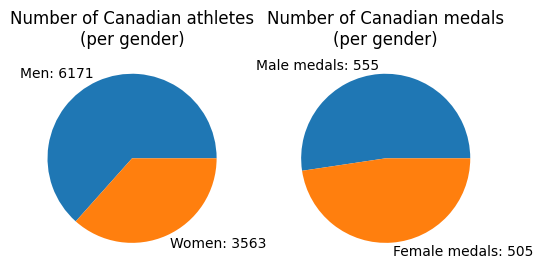

In [7]:
# Distribution of male vs female
Nmen = sum(canada_origdata["Sex"] == "M")
Nwomen = sum(canada_origdata["Sex"] == "F")

# Number of medals per sex
canada_bestsex = count_medals(canada_origdata,"Sex")

Nmale_medals = canada_bestsex.loc["M"][0]
Nfemale_medals = canada_bestsex.loc["F"][0]

# Output
print(canada_bestsex.head())

# Plot
fig,(ax1,ax2) = plt.subplots(1,2, dpi=100, facecolor='white')

ax1.pie([Nmen, Nwomen], 
    labels=[f"Men: {Nmen}", f"Women: {Nwomen}"]
);
ax1.title.set_text("Number of Canadian athletes\n(per gender)")

ax2.pie(
    [Nmale_medals, Nfemale_medals], 
    labels=[f"Male medals: {Nmale_medals}", f"Female medals: {Nfemale_medals}"]
);
ax2.title.set_text("Number of Canadian medals\n(per gender)")


### Idéer

Vad mer kan vi plotta? Nu har jag fokuserat på antal medaljer per diverse.

- Antal atleter per år

- ...

In [37]:
# 1. remove all columns except the two that we want to compare
canada_athletes = canada_origdata.drop(
        [column for column in canada_origdata.columns if (column != "HashName") and (column != "Games")],
        axis="columns"
    )

# 2. Remove all rows with NaN here
canada_athletes = canada_athletes.dropna(axis="rows")

# 3. Add a counter
canada_athletes["Number athletes"] = 1

# 4. Group by one of the two columns
canada_athletes = canada_athletes.groupby("Games").sum()

# Check results
canada_athletes.head()

fig = px.bar(canada_athletes, y=canada_athletes.columns[0]
).show()


In [5]:
canada_origdata.columns

Index(['Unnamed: 0', 'ID', 'Name', 'HashName', 'Sex', 'Age', 'Height',
       'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [2]:
# Functions


print(canada_origdata.columns)

canada_bestsports = af.count_medals(canada_origdata, "Season")

print("")
print(canada_bestsports.head())

fig = px.bar(canada_bestsports, 
    x=canada_bestsports.index, 
    y=canada_bestsports.columns
)
fig.update_layout(barmode='group')
fig.show()



Index(['Unnamed: 0', 'ID', 'Name', 'HashName', 'Sex', 'Age', 'Height',
       'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

        Number medals  Number Bronze  Number Gold  Number Silver
Season                                                          
Summer            741            344          158            239
Winter            611            107          305            199


/home/joachim/.local/share/virtualenvs/Databehandling-OS-Yuna-Joachim-uzpQAkNr/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
